In [70]:
import os
import rasterio as rio
import rioxarray as rxr
import geopandas as gpd
from rasterio.plot import show
from rasterio.plot import plotting_extent
import matplotlib.pyplot as plt
import earthpy.plot as ep
import earthpy.spatial as es
import numpy as np

In [71]:
# Open image and clip
PS_9_28 = rxr.open_rasterio('./data/20240928_153924_25_24c8_3B_AnalyticMS_SR.tif', masked=True)
image = PS_9_28
clipped_image = image[:, 1500:3000, 3500:6000]
ps_plotting_extent = plotting_extent(clipped_image[0], clipped_image.rio.transform())

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'PS NIR distribution'}>)

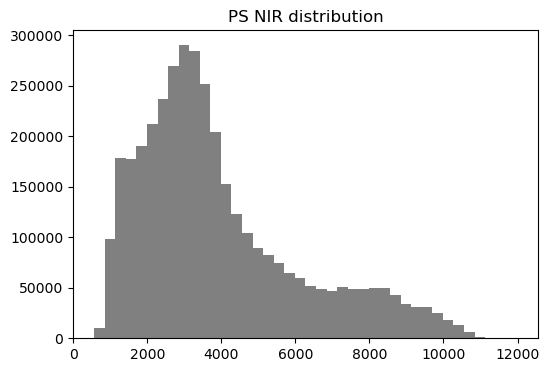

In [72]:
# Get nir values
nir = clipped_image[3].values.astype(np.int16)

# plot histogram
ep.hist(nir,colors=["grey"],figsize=(6, 4), title="PS NIR distribution", bins = 40)

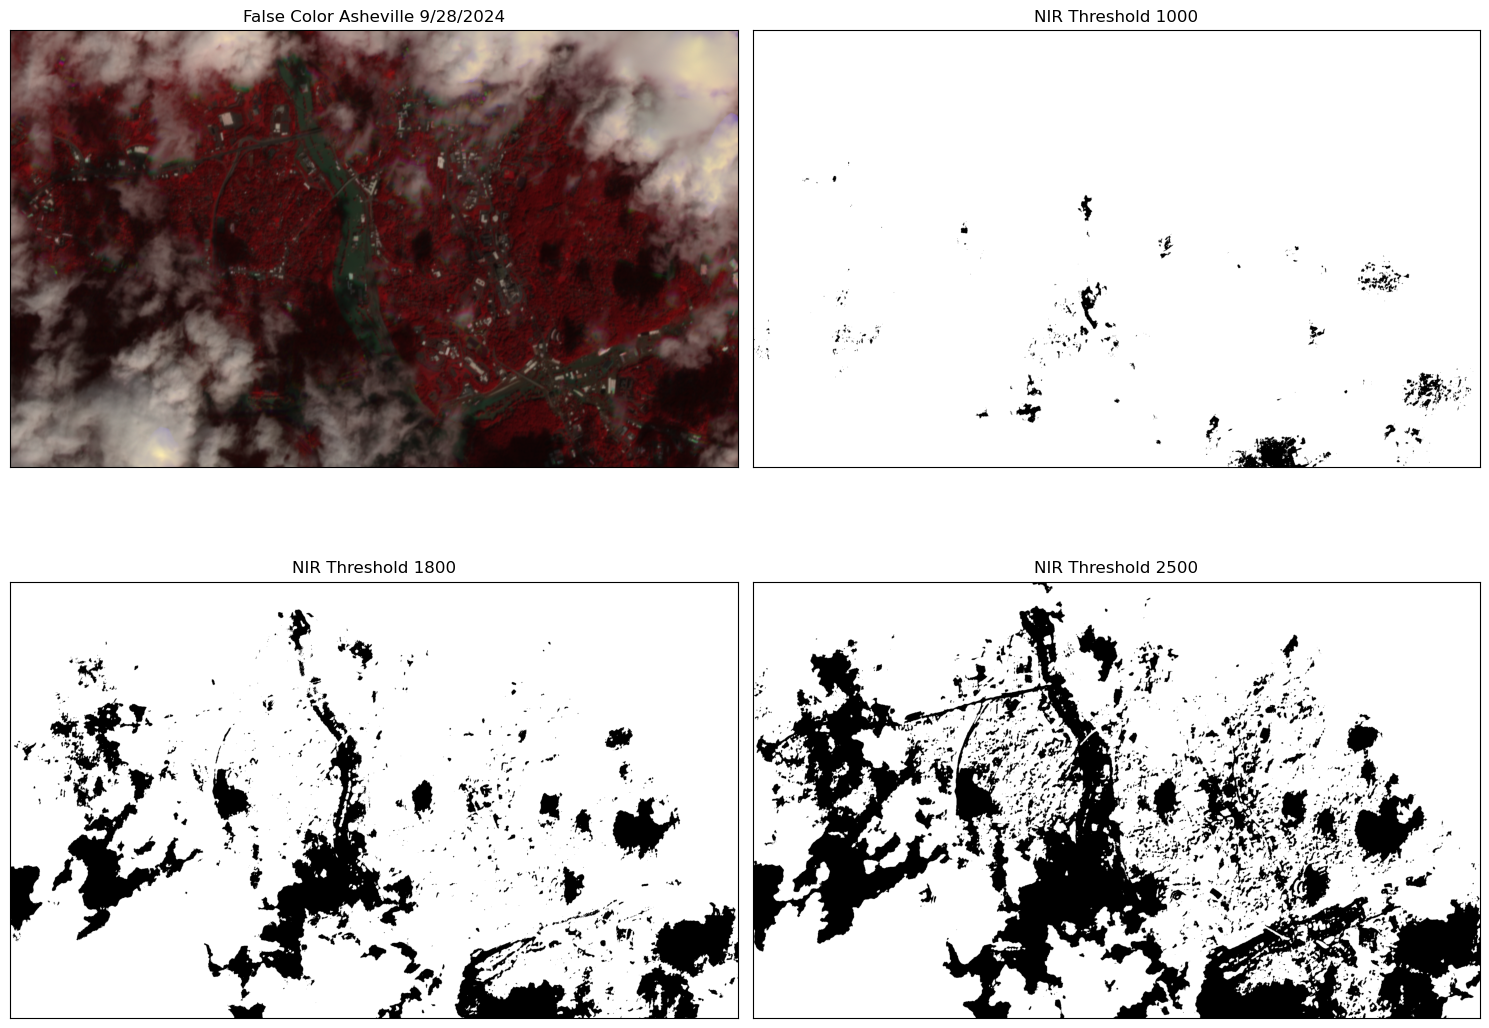

In [ ]:
# Plot false color image with a few thresholds on NIR band
thresholds = [1000, 1800, 2500]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# False Color
ep.plot_rgb(clipped_image.values,
            rgb=[3, 2, 1],
            ax=axes[0, 0],
            title="False Color Asheville 9/28/2024",
            extent=ps_plotting_extent)
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

# NIR Threshold at 1000
ep.plot_bands(np.where(nir > thresholds[0], 0, 1),
              cmap='binary',
              scale=False,
              ax=axes[0, 1],
              title=f"NIR Threshold {thresholds[0]}",
              cbar=False)
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

# NIR Threshold at 1800
ep.plot_bands(np.where(nir > thresholds[1], 0, 1),
              cmap='binary',
              scale=False,
              ax=axes[1, 0],
              title=f"NIR Threshold {thresholds[1]}",
              cbar=False)
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

# NIR Threshold at 2500
ep.plot_bands(np.where(nir > thresholds[2], 0, 1),
              cmap='binary',
              scale=False,
              ax=axes[1, 1],
              title=f"NIR Threshold {thresholds[2]}",
              cbar=False)
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

plt.tight_layout()
plt.show()